# Multiple Linear Regression 

Given a real estate dataset, a multiple linear regression, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
df = pd.read_csv("real_estate_price_size_year.csv")

In [3]:
df.describe(include="all")

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


### Explore the data

In [4]:
x1 = df["size"]
x2 = df["year"]
y = df["price"]

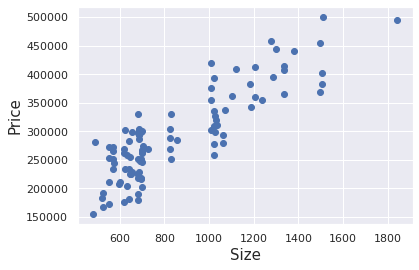

In [5]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

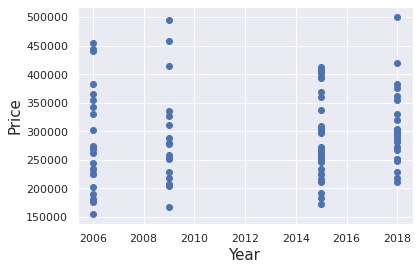

In [6]:
plt.scatter(x2,y)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Create the regression

### Declare the dependent and the independent variables

In [7]:
x_independent = df[["size","year"]]
x = sm.add_constant(x_independent)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.77e-32
Time:                        20:44:20   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression

In [10]:
yhat = -5.772e+06 + 227.7009*df["size"] + 2916.7853*df["year"]
df["predicted price"] = yhat
columns = ["size","year","price","predicted price"]
df = df.reindex (columns=columns)
df


,size,year,price,predicted price
0,643.09,2015,234314.144,251754.551281
1,656.22,2009,228581.528,237243.552298
2,487.29,2018,281626.336,225029.106961
3,1504.75,2015,401255.608,447955.308775
4,1275.46,2009,458674.256,378245.057614
...,...,...,...,...
95,549.80,2009,252460.400,213011.622520
96,1037.44,2009,310522.592,324047.689396
97,1504.75,2006,383635.568,421704.241075
98,648.29,2015,225145.248,252938.595961
